In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
x1=2*np.random.randn(400,2)+5
x2=2*np.random.randn(400,2)+9
bias=(np.ones((800,1)))
x=np.concatenate((x1,x2),axis=0)
x=np.concatenate((bias,x),axis=1)
y1=np.zeros((400,1))
y2=np.ones((400,1))
y=np.concatenate((y1,y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
X_train=X_train
X_test=X_test.T
y_train=y_train.T[0]
y_test=y_test.T[0]
label=[]
for i in range(len(y_train)):
    if y_train[i]==0:
        label.append("blue")
    else:
        label.append("red")
        
    

In [3]:
X_train.shape

(600, 3)

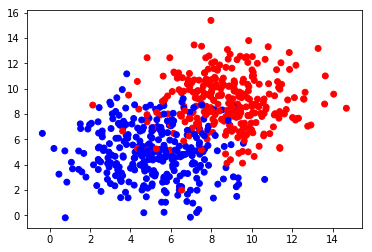

(600, 3)

In [4]:
plt.scatter(X_train[:,1],X_train[:,2],c=label,s=35)
plt.show()
X_train.shape

In [5]:
import math
def sigmoid(z):
    sig=1/(1+math.exp(-z))
    return sig

In [6]:
def cost(x,y,teta):
    m=len(y)
    cost_value=0
    for i in range(m):
        
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        #print(np.log(h_teta))
        cost_iter=y[i]*(np.log(h_teta))+(1-y[i])*((np.log(1-h_teta)))
        #print(cost_iter)
        cost_value=cost_value+ cost_iter
    return (-1/m)*cost_value

In [8]:
def calculate_weight(x,y,teta,rate):
    
    m=len(y)
    
    sum_error1=np.zeros((1,3))
   
    for i in range(m):
        
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        
        sum_error1=sum_error1+((h_teta-y[i])*x[i])
    return teta-rate*sum_error1[0]

In [9]:
teta=np.array([.1,.1,.1])


In [10]:
for i in range(10):
    teta=calculate_weight(x,y,teta,rate=.0001)
    #print(cost(x,y,teta))
    teta

    
    
    

    



In [11]:
x.shape

(800, 3)

In [12]:


for i in range(1000):
    
    teta=calculate_weight(x,y,teta,rate=.0001)



In [13]:
def my_plot(teta):
    x=np.linspace(0,20,300)
    y=(-teta[0]/teta[2])+(-teta[1]/teta[2])*x
    plt.plot(x,y)

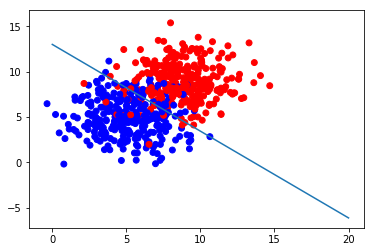

In [14]:
my_plot(teta)
plt.scatter(X_train[:,1],X_train[:,2],c=label,s=35)
plt.show()

In [15]:
g_x=np.matmul(teta,X_test)

y_predicted=np.ones((200,1))
for i in range(len(g_x)):
    if sigmoid(g_x[i])<.5:
        y_predicted[i]=0
        

In [16]:
k_error=0
for i in range(200):
    if y_predicted[i]!=y_test[i]:
        k_error+=1
k_error

12